In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayantikalaskar","key":"9c46cbc3dc0f3d53e9eef348359a288e"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

Dataset URL: https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data
License(s): CC0-1.0
 27% 5.00M/18.4M [00:00<00:00, 45.5MB/s]
100% 18.4M/18.4M [00:00<00:00, 120MB/s] 


In [5]:
!unzip nifty50-stock-market-data.zip

Archive:  nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
  inflatin

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
# Load the CSV file
file_path = '/content/TATASTEEL.csv'
df = pd.read_csv(file_path)
df.shape

(5306, 15)

In [8]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [9]:
# Remove specified columns
columns_to_remove = ['Trades', 'Deliverable Volume', '%Deliverble', 'Series', 'Symbol']
df = df.drop(columns=columns_to_remove)
df.info

<bound method DataFrame.info of             Date  Prev Close     Open     High      Low     Last    Close  \
0     2000-01-03      142.35   148.00   153.20   146.10   152.50   152.45   
1     2000-01-04      152.45   150.10   153.00   143.05   151.95   150.80   
2     2000-01-05      150.80   144.60   162.90   144.60   158.00   156.55   
3     2000-01-06      156.55   158.95   169.10   158.95   169.00   168.25   
4     2000-01-07      168.25   173.40   179.00   166.30   170.55   171.95   
...          ...         ...      ...      ...      ...      ...      ...   
5301  2021-04-26      925.60   935.00   956.00   930.05   942.50   940.75   
5302  2021-04-27      940.75   948.30   983.00   944.30   982.00   977.75   
5303  2021-04-28      977.75   985.00   986.00   962.00   971.00   971.40   
5304  2021-04-29      971.40   983.00  1036.95   983.00  1035.00  1031.35   
5305  2021-04-30     1031.35  1024.00  1052.60  1011.10  1025.60  1034.00   

         VWAP    Volume      Turnover  
0      150.92   2003185  3.023164e+13  
1      151.03   1555136  2.348785e+13  
2      156.85   3840284  6.023364e+13  
3      167.61   2560449  4.291530e+13  
4      173.89   3641691  6.332459e+13  
...       ...       ...           ...  
5301   942.98  21234858  2.002407e+15  
5302   965.43  24904515  2.404346e+15  
5303   972.08  20447968  1.987700e+15  
5304  1015.76  44718647  4.542359e+15  
5305  1031.95  28129738  2.902854e+15  

[5306 rows x 10 columns]>

In [10]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13
1,2000-01-04,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13
2,2000-01-05,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13
3,2000-01-06,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13
4,2000-01-07,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13


In [11]:
# Check for null values
print("Null values before removing:", df.isnull().sum())

# Remove null records
df = df.dropna()

# Check for null values after removing
print("Null values after removing:", df.isnull().sum())

Null values before removing: Date          0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64
Null values after removing: Date          0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64


In [12]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def rnn_forward(X, Wx, Wh, Wy, bh, by):
    h_t = np.zeros((X.shape[0], Wh.shape[0]))
    y_pred = np.zeros((X.shape[0], 1))

    for t in range(X.shape[0]):
        h_t[t] = sigmoid(np.dot(X[t], Wx) + np.dot(h_t[t-1], Wh) + bh)
        y_pred[t] = np.dot(h_t[t], Wy) + by

    return h_t, y_pred

def train_rnn(X, y, learning_rate, epochs, hidden_size=64):
    input_size = X.shape[1]
    output_size = 1
    Wx = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    Wh = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size)
    Wy = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    bh = np.zeros((1, hidden_size))
    by = np.zeros((1, output_size))

    for epoch in range(epochs):
        h_t, y_pred = rnn_forward(X, Wx, Wh, Wy, bh, by)

#         loss = np.mean((y_pred - y) ** 2) / 10000000000000
        loss = np.mean((y_pred - y) ** 2)


        dWy = np.dot(h_t.T, y_pred - y)
        dWh = np.zeros_like(Wh)
        dWx = np.zeros_like(Wx)
        dbh = np.zeros_like(bh)
        dby = np.sum(y_pred - y, axis=0, keepdims=True)

        for t in reversed(range(X.shape[0])):
            dh_t = np.dot(Wy, (y_pred[t] - y[t])) * (h_t[t] * (1 - h_t[t]))
            dWx += np.outer(X[t], dh_t)
            dbh += dh_t
            if t != 0:
                dWh += np.outer(h_t[t-1], dh_t)

        for gradient in [dWx, dWh, dWy, dbh, dby]:
            np.clip(gradient, -5, 5, out=gradient)

        learning_rate *= 0.9

        Wx -= learning_rate * dWx
        Wh -= learning_rate * dWh
        Wy -= learning_rate * dWy
        bh -= learning_rate * dbh
        by -= learning_rate * dby

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return Wx, Wh, Wy, bh, by

def predict_rnn(X, Wx, Wh, Wy, bh, by):
    h_t, y_pred = rnn_forward(X, Wx, Wh, Wy, bh, by)
    return y_pred[-1][0]

# Example usage with your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize input data
normalized_df = (df - df.mean()) / df.std()

# Set target and features
target_column = 'Close'
target = normalized_df[target_column].values.reshape(-1, 1)
features = normalized_df.drop(target_column, axis=1).values

# Train the RNN
Wx, Wh, Wy, bh, by = train_rnn(features, target, learning_rate=0.001, epochs=1000)

Epoch 0, Loss: 1.1722611815031405
Epoch 100, Loss: 0.034877563927455696
Epoch 200, Loss: 0.03487625433266852
Epoch 300, Loss: 0.03487625429788491
Epoch 400, Loss: 0.03487625429788413
Epoch 500, Loss: 0.03487625429788413
Epoch 600, Loss: 0.03487625429788413
Epoch 700, Loss: 0.03487625429788413
Epoch 800, Loss: 0.03487625429788413
Epoch 900, Loss: 0.03487625429788413


Epoch 0, Loss: 1.5462647707938655
Epoch 100, Loss: 0.049721436849821214
Epoch 200, Loss: 0.04971760994872447
Epoch 300, Loss: 0.0497176098470921
Epoch 400, Loss: 0.04971760984708974
Epoch 500, Loss: 0.04971760984708974
Epoch 600, Loss: 0.04971760984708974
Epoch 700, Loss: 0.04971760984708974
Epoch 800, Loss: 0.04971760984708974
Epoch 900, Loss: 0.04971760984708974


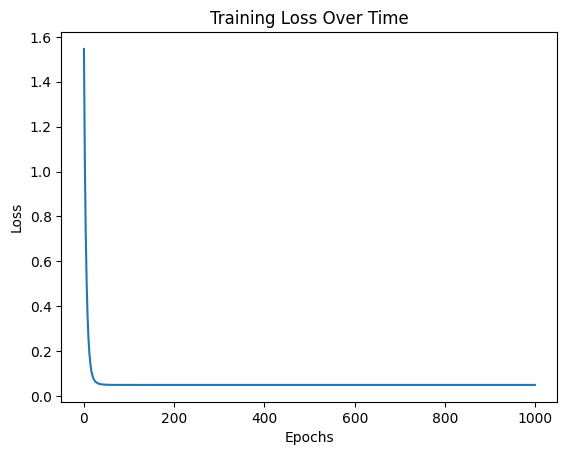

In [21]:
def train_rnn(X, y, learning_rate, epochs, hidden_size=64):
    input_size = X.shape[1]
    output_size = 1
    Wx = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    Wh = np.random.randn(hidden_size, hidden_size) / np.sqrt(hidden_size)
    Wy = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    bh = np.zeros((1, hidden_size))
    by = np.zeros((1, output_size))

    loss_history = []

    for epoch in range(epochs):
        h_t, y_pred = rnn_forward(X, Wx, Wh, Wy, bh, by)
        loss = np.mean((y_pred - y) ** 2)
        loss_history.append(loss)

        dWy = np.dot(h_t.T, y_pred - y)
        dWh = np.zeros_like(Wh)
        dWx = np.zeros_like(Wx)
        dbh = np.zeros_like(bh)
        dby = np.sum(y_pred - y, axis=0, keepdims=True)

        for t in reversed(range(X.shape[0])):
            dh_t = np.dot(Wy, (y_pred[t] - y[t])) * (h_t[t] * (1 - h_t[t]))
            dWx += np.outer(X[t], dh_t)
            dbh += dh_t
            if t != 0:
                dWh += np.outer(h_t[t-1], dh_t)

        for gradient in [dWx, dWh, dWy, dbh, dby]:
            np.clip(gradient, -5, 5, out=gradient)

        learning_rate *= 0.9

        Wx -= learning_rate * dWx
        Wh -= learning_rate * dWh
        Wy -= learning_rate * dWy
        bh -= learning_rate * dbh
        by -= learning_rate * dby

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return Wx, Wh, Wy, bh, by, loss_history

# Train the RNN and get the loss history
Wx, Wh, Wy, bh, by, loss_history = train_rnn(features, target, learning_rate=0.001, epochs=1000)

# Plot training loss
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

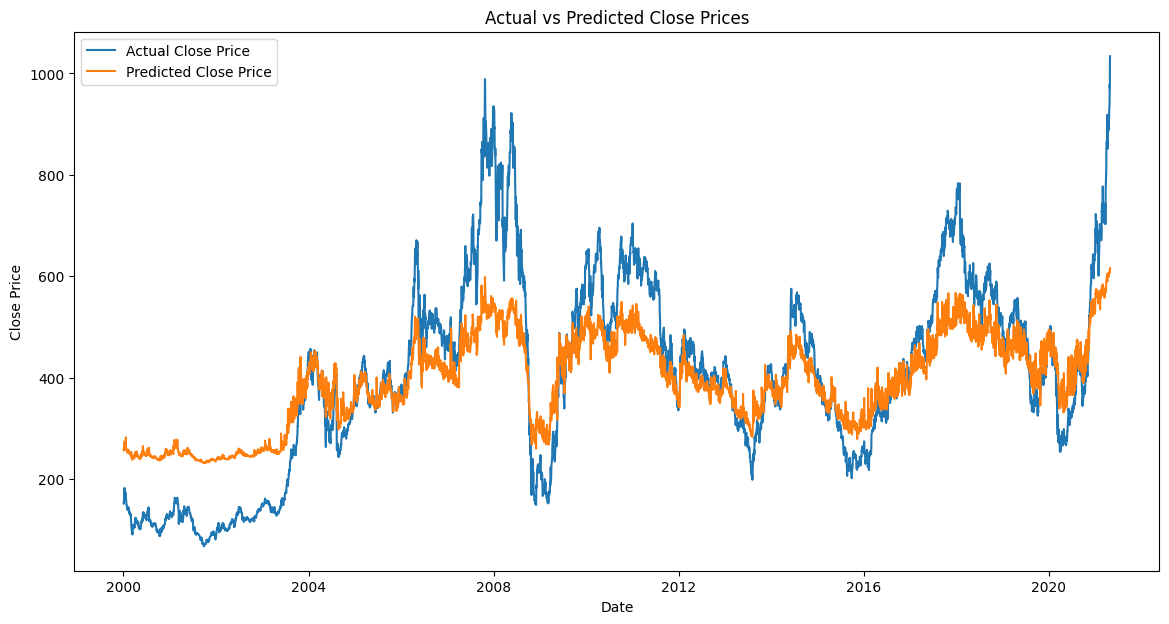

In [25]:
# Make predictions on the entire dataset
predicted_close_prices = np.array([predict_rnn(features[i:i+1], Wx, Wh, Wy, bh, by) for i in range(len(features))])

# Denormalize the predictions
denormalized_predictions = predicted_close_prices * df[target_column].std() + df[target_column].mean()

# Add predictions to the dataframe
df['Predicted_Close'] = denormalized_predictions

# Plot actual vs predicted close prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df[target_column], label='Actual Close Price')
plt.plot(df.index, df['Predicted_Close'], label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(df[target_column], df['Predicted_Close'])
mae = mean_absolute_error(df[target_column], df['Predicted_Close'])
r2 = r2_score(df[target_column], df['Predicted_Close'])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 10794.6194550198
Mean Absolute Error: 79.86667361289668
R-squared: 0.6922789772642748


Accuracy: 0.8356577459479834
Precision: 0.9971469329529244
Recall: 0.44550669216061184
F1 Score: 0.6158590308370044
ROC AUC: 0.7224857517533056


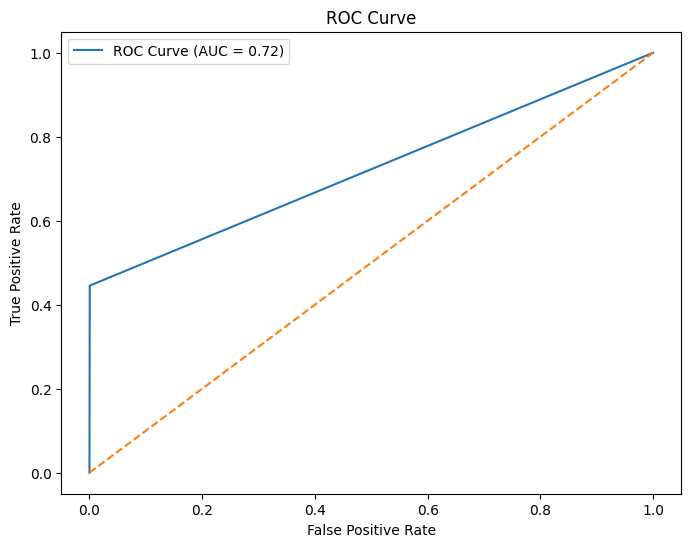

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming `y_true` is the true labels and `y_pred_proba` is the predicted probabilities
# Convert regression predictions to binary classification for this example
threshold = 0.5
y_pred = (np.array(predicted_close_prices) > threshold).astype(int)
y_true = (target > threshold).astype(int)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()